## Data Preprocessing

In [122]:
#1. import library
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_csv('dataset/people analytics.csv')
df.head() #head untuk 5 baris teratas

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [124]:
#3. Inspect data
#deskripsikan data numerik (count, mean, std, min, dll)
df.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,41.029410,4.476070,2.995430,6403.211000,44.956950,24.431170,14.514930,7.008550,50.090500,10.013560,49.506060,0.999720,2.999088
std,28867.657797,11.244121,2.869336,1.414726,1372.508717,8.942003,14.469584,8.664026,4.331591,35.351157,5.495405,28.890383,0.815872,1.150719
min,1.000000,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,25000.750000,31.000000,2.000000,2.000000,5250.000000,37.000000,12.000000,7.000000,3.000000,25.000000,5.000000,25.000000,0.000000,2.010000
50%,50000.500000,41.000000,4.000000,3.000000,6500.000000,45.000000,24.000000,15.000000,7.000000,50.000000,10.000000,49.000000,1.000000,3.000000
75%,75000.250000,51.000000,7.000000,4.000000,7500.000000,53.000000,37.000000,22.000000,11.000000,75.000000,15.000000,75.000000,2.000000,3.990000
max,100000.000000,60.000000,10.000000,5.000000,9000.000000,60.000000,49.000000,29.000000,14.000000,100.000000,19.000000,99.000000,2.000000,5.000000


In [125]:
#3. Inspect data
#deskripsikan data kategori
df.describe(include='object')

,Department,Gender,Job_Title,Hire_Date,Education_Level
count,100000,100000,100000,100000,100000
unique,9,3,7,3650,4
top,Marketing,Male,Specialist,2020-09-29 08:03:05.556036,Bachelor
freq,11216,48031,14507,46,50041


In [126]:
numerik = df.select_dtypes(include=['number']).columns.tolist()
kategorik = df.select_dtypes(exclude=['number']).columns.tolist()

df[numerik].head()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score
0,1,55,2,5,6750.0,33,32,22,2,0,14,66,0,2.63
1,2,29,0,5,7500.0,34,34,13,14,100,12,61,2,1.72
2,3,55,8,3,5850.0,37,27,6,3,50,10,1,0,3.17
3,4,48,7,2,4800.0,52,10,28,12,100,10,0,1,1.86
4,5,36,3,2,4800.0,38,11,29,13,100,15,9,1,1.25


In [127]:
#4.Missing value
#melihat missing value
df.isna().sum()

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

In [128]:
#4.Missing value
#menghapus missing value
#jalankan jika ada missing value, jika tidak, tidak lanjut ke tahap berikutnya
df = df.dropna()
df.shape

(100000, 20)

In [130]:
df.duplicated().sum()

np.int64(0)

In [135]:
# Deteksi outlier dengan IQR
#Tidak Dihapus
# Hitung Q1, Q3, dan IQR untuk kolom numerik
Q1 = df[numerik].quantile(0.25)
Q3 = df[numerik].quantile(0.75)
IQR = Q3 - Q1
#Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_outlier = df[((df[numerik] < lower_bound) | (df[numerik] > upper_bound)).any(axis=1)]

print('Data outlier: ', df_outlier.shape[0], 'baris')

Data outlier:  0 baris


In [131]:
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'])

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Employee_ID                  100000 non-null  int64         
 1   Department                   100000 non-null  object        
 2   Gender                       100000 non-null  object        
 3   Age                          100000 non-null  int64         
 4   Job_Title                    100000 non-null  object        
 5   Hire_Date                    100000 non-null  datetime64[ns]
 6   Years_At_Company             100000 non-null  int64         
 7   Education_Level              100000 non-null  object        
 8   Performance_Score            100000 non-null  int64         
 9   Monthly_Salary               100000 non-null  float64       
 10  Work_Hours_Per_Week          100000 non-null  int64         
 11  Projects_Handled           

In [133]:
#Konversi data
df['year']=df['Hire_Date'].dt.year
df['month']=df['Hire_Date'].dt.month
df['day']=df['Hire_Date'].dt.day
df['day_of_week']=df['Hire_Date'].dt.day_name()

In [134]:
df

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,...,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned,year,month,day,day_of_week
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,...,0,14,66,0,2.63,False,2022,1,19,Wednesday
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,...,100,12,61,2,1.72,False,2024,4,18,Thursday
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,...,50,10,1,0,3.17,False,2015,10,26,Monday
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,...,100,10,0,1,1.86,False,2016,10,22,Saturday
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,...,100,15,9,1,1.25,False,2021,7,23,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,...,75,16,48,2,1.28,False,2022,12,7,Wednesday
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,...,0,10,77,1,3.48,True,2018,7,24,Tuesday
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,...,0,5,87,1,2.60,False,2015,11,24,Tuesday
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,...,75,2,31,1,3.10,False,2015,8,3,Monday


Outlier dalam dataset ini tidak dihapus karena nilai ekstrem tersebut merupakan bagian alami dari dinamika data HR, bukan error input. Outlier justru memberikan insight penting terkait kinerja pegawai, beban kerja, dan pola kepuasan karyawan. Selain itu, analisis people analytics dalam proyek ini tidak sensitif terhadap outlier sehingga tidak diperlukan tindakan penghapusan

In [136]:
#Future engineering
df['Performance Category'] = [
    'Excellent' if n >= 5
    else 'Good' if n >= 4
    else 'Average' if n >= 3
    else 'Poor'
    for n in df['Performance_Score']
]
df[['Performance_Score', 'Performance Category']].head()

,Performance_Score,Performance Category
0,5,Excellent
1,5,Excellent
2,3,Average
3,2,Poor
4,2,Poor


In [137]:
print(df['Performance Category'].value_counts())

Performance Category
Poor         40133
Average      19999
Good         19940
Excellent    19928
Name: count, dtype: int64


In [138]:
df['Age_Group'] = pd.cut(
    df['Age'],
    bins=[18, 30, 40, 50, 100],
    labels=['Young', 'Adult', 'Senior', 'Old']
)
df

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,...,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned,year,month,day,day_of_week,Performance Category,Age_Group
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,...,66,0,2.63,False,2022,1,19,Wednesday,Excellent,Old
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,...,61,2,1.72,False,2024,4,18,Thursday,Excellent,Young
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,...,1,0,3.17,False,2015,10,26,Monday,Average,Old
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,...,0,1,1.86,False,2016,10,22,Saturday,Poor,Senior
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,...,9,1,1.25,False,2021,7,23,Friday,Poor,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,...,48,2,1.28,False,2022,12,7,Wednesday,Good,Young
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,...,77,1,3.48,True,2018,7,24,Tuesday,Excellent,Adult
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,...,87,1,2.60,False,2015,11,24,Tuesday,Poor,Old
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,...,31,1,3.10,False,2015,8,3,Monday,Excellent,Young


In [139]:
df['Work_Intensity'] = df['Work_Hours_Per_Week'] * df['Projects_Handled']
df

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,...,Promotions,Employee_Satisfaction_Score,Resigned,year,month,day,day_of_week,Performance Category,Age_Group,Work_Intensity
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,...,0,2.63,False,2022,1,19,Wednesday,Excellent,Old,1056
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,...,2,1.72,False,2024,4,18,Thursday,Excellent,Young,1156
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,...,0,3.17,False,2015,10,26,Monday,Average,Old,999
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,...,1,1.86,False,2016,10,22,Saturday,Poor,Senior,520
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,...,1,1.25,False,2021,7,23,Friday,Poor,Adult,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,...,2,1.28,False,2022,12,7,Wednesday,Good,Young,2530
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,...,1,3.48,True,2018,7,24,Tuesday,Excellent,Adult,1365
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,...,1,2.60,False,2015,11,24,Tuesday,Poor,Old,403
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,...,1,3.10,False,2015,8,3,Monday,Excellent,Young,1505


In [140]:
df['Remote_Work_Category'] = [
    'Fully Remote' if n == 100  # Convert n to integer before comparison
    else 'Very Often' if 50 <= n <= 75  # Convert n to integer before comparison
    else 'Rarely' if n < 50  # Convert n to integer before comparison
    else 'Poor'
    for n in df['Remote_Work_Frequency']
]
df[['Remote_Work_Category', 'Remote_Work_Frequency']].head()


,Remote_Work_Category,Remote_Work_Frequency
0,Rarely,0
1,Fully Remote,100
2,Very Often,50
3,Fully Remote,100
4,Fully Remote,100


In [141]:
df['Resign_Flag'] = df['Resigned'].astype(int)
df

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,...,Resigned,year,month,day,day_of_week,Performance Category,Age_Group,Work_Intensity,Remote_Work_Category,Resign_Flag
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,...,False,2022,1,19,Wednesday,Excellent,Old,1056,Rarely,0
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,...,False,2024,4,18,Thursday,Excellent,Young,1156,Fully Remote,0
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,...,False,2015,10,26,Monday,Average,Old,999,Very Often,0
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,...,False,2016,10,22,Saturday,Poor,Senior,520,Fully Remote,0
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,...,False,2021,7,23,Friday,Poor,Adult,418,Fully Remote,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,...,False,2022,12,7,Wednesday,Good,Young,2530,Very Often,0
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,...,True,2018,7,24,Tuesday,Excellent,Adult,1365,Rarely,1
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,...,False,2015,11,24,Tuesday,Poor,Old,403,Rarely,0
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,...,False,2015,8,3,Monday,Excellent,Young,1505,Very Often,0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Employee_ID                  100000 non-null  int64         
 1   Department                   100000 non-null  object        
 2   Gender                       100000 non-null  object        
 3   Age                          100000 non-null  int64         
 4   Job_Title                    100000 non-null  object        
 5   Hire_Date                    100000 non-null  datetime64[ns]
 6   Years_At_Company             100000 non-null  int64         
 7   Education_Level              100000 non-null  object        
 8   Performance_Score            100000 non-null  int64         
 9   Monthly_Salary               100000 non-null  float64       
 10  Work_Hours_Per_Week          100000 non-null  int64         
 11  Projects_Handled           

In [143]:
df.to_csv('data_miniproject4.csv', index=False)

In [144]:
df.to_csv('C:/download/data_miniproject4.csv', index=False)

In [145]:
import os

# Create the directory if it doesn't exist
os.makedirs('C:/download', exist_ok=True)

# Now save the file
df.to_csv('C:/download/data_miniproject4.csv', index=False)

In [146]:
# 1. Load data awal
df = pd.read_csv('data_miniproject4.csv')

# 2. Cleaning process
df_cleaned = df.dropna()  # contoh cleaning
df_cleaned = df_cleaned.drop_duplicates()

# 3. Simpan data cleaned
df_cleaned.to_csv('data_miniproject4.sv', index=False)

print("Data berhasil disimpan!")
print(f"Shape data cleaned: {df_cleaned.shape}")

Data berhasil disimpan!
Shape data cleaned: (100000, 29)


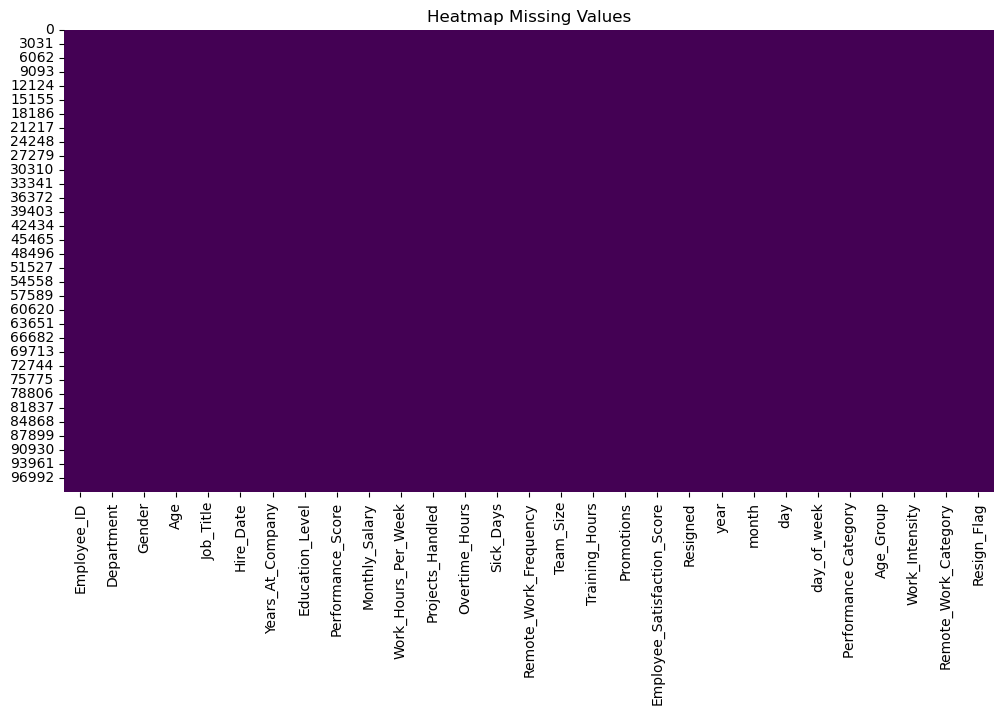

In [147]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap Missing Values')
plt.show()
#tidak ada missing value sama sekali

Heatmap missing value pada dataset ini berwarna ungu seluruhnya karena tidak ditemukan nilai yang hilang (missing values) pada setiap kolom. Hal ini menandakan bahwa dataset sudah bersih dari missing value, sehingga tidak diperlukan proses imputasi maupun penghapusan data pada tahap ini.

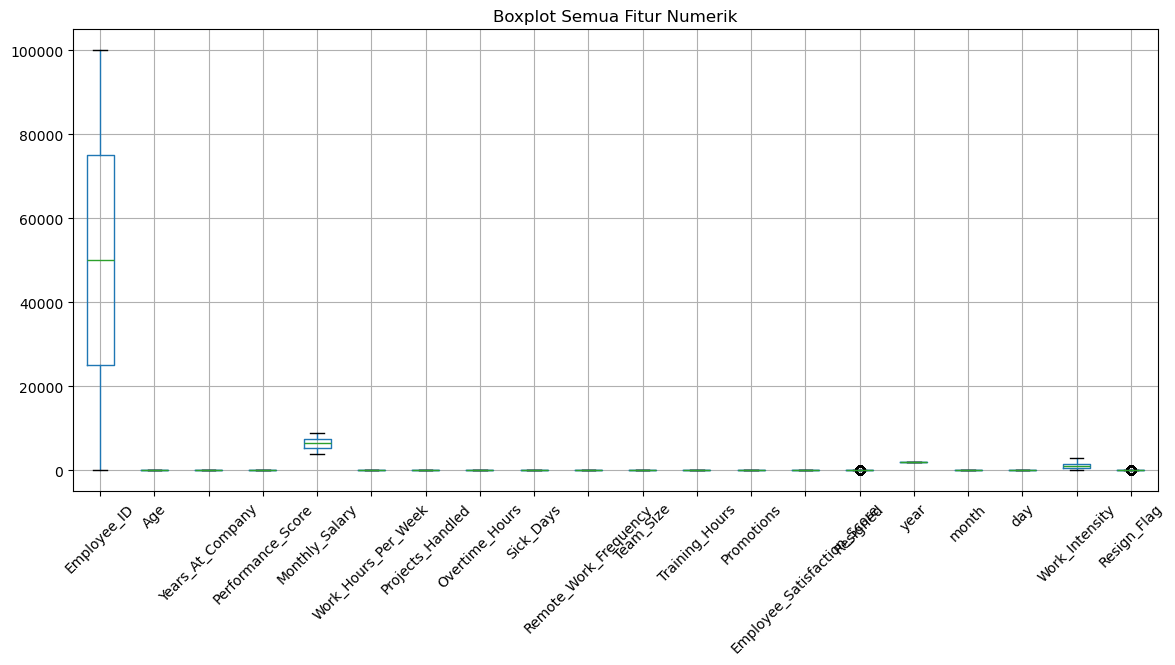

In [148]:
plt.figure(figsize=(14, 6))
df.boxplot(rot=45)
plt.title('Boxplot Semua Fitur Numerik')
plt.show()

Tidak terlihat adanya outlier dalam boxplot dan rentang yang paling panjang merupakan jumlah employee yang ada diperusahaan, diatas masih merupaka integer tetapi di tableau sudah di ubah menjadi string karena ini merupakan identitas dan bukan angka yang bisa untuk hitung.

Feature Engineering:
1. Extract Year, Month, Day dari Hire Date: Memecah tanggal ke dalam komponen tahun/bulan/hari membuat data lebih mudah diolah dalam visualisasi atau model prediktif.
2. Membuat Age Group (Young, Adult, Senior, Old):Mengelompokkan usia membantu melihat pola performa, kepuasan, dan workload berdasarkan kelompok umur.
3. Work Intensity:Fitur ini menangkap beban kerja total sehingga lebih representatif dibanding hanya jam kerja atau lembur saja.j
4. Performance Category (Excellent, Good, Average, Poor):Mengubah skor numerik menjadi kategori meningkatkan interpretabilitas.
5. Remote Work Category (Fully Remote, Rarely, Very Often.):Mengubah frekuensi remote menjadi kelompok kategori membantu memahami pola perilaku kerja jarak jauh.
6. Resign_Flag (0/1):Memudahkan penggunaan dalam model analitik atau KPI.